In [7]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accidents')
jovian.set_colab_id('1RWA9O-F5UV3AZIiomIoU-jURfw_nHLSY')

In [8]:
!pip install jovian --upgrade --quiet


In [9]:
!pip install opendatasets --upgrade --quiet

## Download the data

1.   download the data from Kaggle
2.   or using import opendatasets as od
      download_url='URL'
       



In [10]:
import opendatasets as od 

download_url ='https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vijaysvijju
Your Kaggle Key: ··········


  2%|▏         | 5.00M/299M [00:00<00:07, 43.2MB/s]

100%|██████████| 299M/299M [00:01<00:00, 199MB/s]


In [11]:
data_filename = './us-accidents/US_Accidents_Dec20.csv'

## Data Preparation and Cleaning

- Load the file
- look at the info about the file
- Fix any missing or incorrrect files.

In [12]:
import pandas as pd

In [13]:
df =pd.read_csv(data_filename)


In [14]:
df.info

<bound method DataFrame.info of                 ID    Source  ...  Nautical_Twilight  Astronomical_Twilight
0              A-1  MapQuest  ...              Night                  Night
1              A-2  MapQuest  ...              Night                    Day
2              A-3  MapQuest  ...                Day                    Day
3              A-4  MapQuest  ...                Day                    Day
4              A-5  MapQuest  ...                Day                    Day
...            ...       ...  ...                ...                    ...
4232536  A-4239402      Bing  ...                Day                    Day
4232537  A-4239403      Bing  ...                Day                    Day
4232538  A-4239404      Bing  ...                Day                    Day
4232539  A-4239405      Bing  ...                Day                    Day
4232540  A-4239406      Bing  ...                Day                    Day

[4232541 rows x 49 columns]>

In [15]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [16]:
len(df.columns)

49

In [17]:
len(df)

4232541

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [19]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.716477e+06,4.232541e+06,4.232541e+06,4.232541e+06,1.516064e+06,1.516064e+06,4.232541e+06,1.544592e+06,4.142641e+06,2.336540e+06,4.137074e+06,4.156157e+06,4.133873e+06,3.753215e+06,2.166952e+06
mean,2.083517e+02,2.305035e+00,3.639782e+01,-9.546420e+01,3.690061e+01,-9.859901e+01,3.357021e-01,6.141507e+03,6.147799e+01,5.489319e+01,6.567422e+01,2.969371e+01,9.111991e+00,7.903433e+00,1.244719e-02
std,2.124413e+01,5.332261e-01,4.964404e+00,1.735319e+01,5.165629e+00,1.849590e+01,1.602143e+00,1.492268e+04,1.852586e+01,2.272355e+01,2.272342e+01,8.639260e-01,2.817582e+00,5.330998e+00,1.637154e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.352058e+01,-1.173570e+02,3.385420e+01,-1.182077e+02,0.000000e+00,8.980000e+02,4.900000e+01,3.800000e+01,4.900000e+01,2.964000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.582542e+01,-9.002078e+01,3.735134e+01,-9.437987e+01,0.000000e+00,2.890000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.993000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.018313e+01,-8.084682e+01,4.072593e+01,-8.087449e+01,8.900000e-02,7.330000e+03,7.520000e+01,7.300000e+01,8.500000e+01,3.008000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,9.999997e+06,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.500000e+01


 


#  questions

> Indented block


- which states have higher no of accidents ? 
- Does Accident occur only in warmer areas or colder areas ?? 
- What is the visibility status during those accidents took place ? 
- Does windspeed have anything to do with these accidents ? 
- accidents per capita ?? 
- does severity change in colder areas ?? 





# Finding numeric columns in df


In [20]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

15

## Missing or Incorrect Values


In [21]:
df.isnull().sum()

ID                             0
Source                         0
TMC                      1516064
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2716477
End_Lng                  2716477
Distance(mi)                   0
Description                    2
Number                   2687949
Street                         0
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1292
Country                        0
Timezone                    4615
Airport_Code                8973
Weather_Timestamp          62644
Temperature(F)             89900
Wind_Chill(F)            1896001
Humidity(%)                95467
Pressure(in)               76384
Visibility(mi)             98668
Wind_Direction             83611
Wind_Speed(mph)           479326
Precipitat

In [22]:
df.isnull().sum().sort_values(ascending=False)

End_Lat                  2716477
End_Lng                  2716477
Number                   2687949
Precipitation(in)        2065589
Wind_Chill(F)            1896001
TMC                      1516064
Wind_Speed(mph)           479326
Visibility(mi)             98668
Weather_Condition          98383
Humidity(%)                95467
Temperature(F)             89900
Wind_Direction             83611
Pressure(in)               76384
Weather_Timestamp          62644
Airport_Code                8973
Timezone                    4615
Zipcode                     1292
Nautical_Twilight            141
Astronomical_Twilight        141
Civil_Twilight               141
Sunrise_Sunset               141
City                         137
Description                    2
Amenity                        0
Street                         0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng 

#  percentage of missing values 

In [23]:
missing_percentages = df.isnull().sum().sort_values(ascending=False) / len(df)
missing_percentages

End_Lat                  6.418076e-01
End_Lng                  6.418076e-01
Number                   6.350674e-01
Precipitation(in)        4.880258e-01
Wind_Chill(F)            4.479581e-01
TMC                      3.581924e-01
Wind_Speed(mph)          1.132478e-01
Visibility(mi)           2.331176e-02
Weather_Condition        2.324443e-02
Humidity(%)              2.255548e-02
Temperature(F)           2.124020e-02
Wind_Direction           1.975433e-02
Pressure(in)             1.804684e-02
Weather_Timestamp        1.480057e-02
Airport_Code             2.120003e-03
Timezone                 1.090362e-03
Zipcode                  3.052540e-04
Nautical_Twilight        3.331332e-05
Astronomical_Twilight    3.331332e-05
Civil_Twilight           3.331332e-05
Sunrise_Sunset           3.331332e-05
City                     3.236826e-05
Description              4.725294e-07
Amenity                  0.000000e+00
Street                   0.000000e+00
Source                   0.000000e+00
Severity    

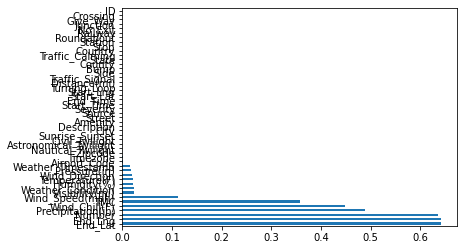

In [24]:
missing_percentages.plot(kind='barh')

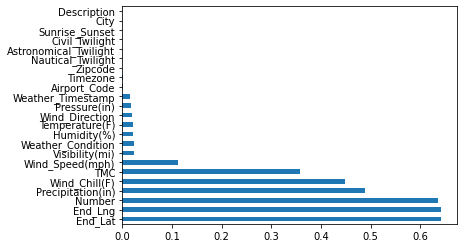

In [25]:
missing_percentages[missing_percentages !=0].plot(kind='barh')


## Exploratory data analysis and Visualisation

Questions

* Are accidents occuring in warmer or colder areas ?    
* Among top 100 cities , which state do they belong ?? 

Columns to analyse 

1. City                                    
2. Start time
3. Start lat,End Lat
4. Temperature 
5. Weather Condtion
6. Windspeed
7. Visiblity 



---
Insights gained 

*   less than 5% of cities have more than 1000 yearly accidents
*   





In [26]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Analysis of each Columns
## City

In [27]:
df.City

0                Dayton
1          Reynoldsburg
2          Williamsburg
3                Dayton
4                Dayton
               ...     
4232536       Riverside
4232537       San Diego
4232538          Orange
4232539     Culver City
4232540        Highland
Name: City, Length: 4232541, dtype: object

In [28]:
Cities=df.City.unique()
len(Cities)

12251

In [29]:
Cities_by_accident = df.City.value_counts()
Cities_by_accident

Houston        114905
Los Angeles     92701
Charlotte       88887
Dallas          77303
Austin          70538
                ...  
Happy Creek         1
Great Mills         1
Otway               1
Headrick            1
Lewis               1
Name: City, Length: 12250, dtype: int64

In [30]:
Cities_by_accident[:15]

Houston          114905
Los Angeles       92701
Charlotte         88887
Dallas            77303
Austin            70538
Miami             63162
Raleigh           52876
Atlanta           46328
Baton Rouge       42814
Nashville         41850
Orlando           39561
Oklahoma City     39484
Sacramento        38061
Phoenix           32805
Minneapolis       31781
Name: City, dtype: int64

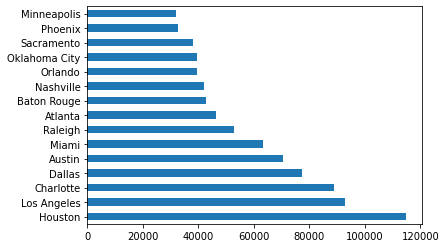

In [31]:
Cities_by_accident[:15].plot(kind='barh')

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


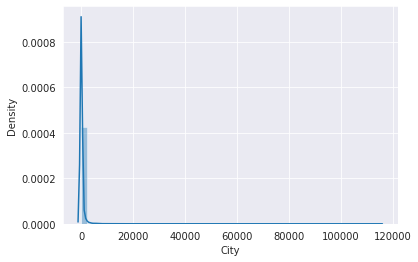

In [33]:
sns.distplot(Cities_by_accident)

In [34]:
high_accident_cities = Cities_by_accident[Cities_by_accident >=1000]
low_accident_cities = Cities_by_accident[Cities_by_accident < 1000]

In [35]:
len(high_accident_cities)

704

In [36]:
len(low_accident_cities)

11546

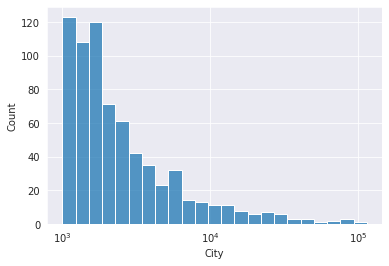

In [37]:
sns.histplot(high_accident_cities,log_scale=True)

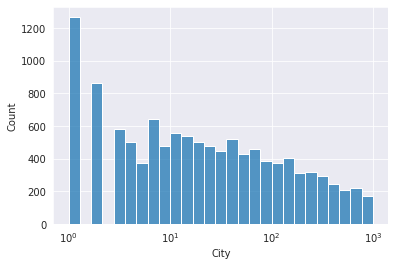

In [38]:
sns.histplot(low_accident_cities,log_scale=True)

## 2.Start_time

1.   What time of the day do accidents occur frequently ?? 
2.   Which days of the week do these accidents occur frequently ?? 
3.   which months have higher no of accidents ?? 




In [39]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [40]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
4232536    2019-08-23 18:03:25
4232537    2019-08-23 19:11:30
4232538    2019-08-23 19:00:21
4232539    2019-08-23 19:00:21
4232540    2019-08-23 18:52:06
Name: Start_Time, Length: 4232541, dtype: object

# convert date to time

In [41]:
df.Start_Time=pd.to_datetime(df.Start_Time)

In [42]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

# datepart - to seperate date and hour

In [43]:
df.Start_Time.dt.hour[:10]

0    5
1    6
2    6
3    7
4    7
5    7
6    7
7    7
8    8
9    8
Name: Start_Time, dtype: int64

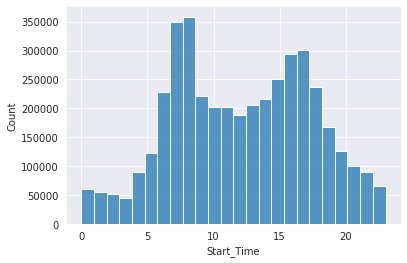

In [44]:
sns.histplot(df.Start_Time.dt.hour,bins=24)



*   High % of accidents occur during peak hours 
*   May be due to hurry in getting to work



# with Percentages on y axis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


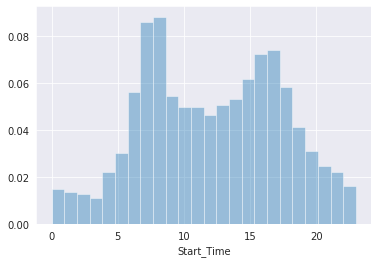

In [45]:
sns.distplot(df.Start_Time.dt.hour,bins=24, kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


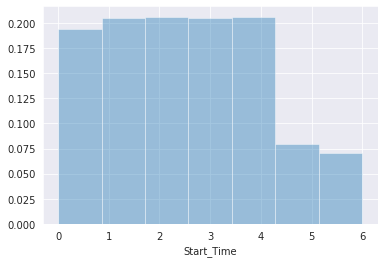

In [46]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7, kde=False,norm_hist=True)



*   So on weekdays there seems to be more accidents happening.
*   On weekends there are less people travelling, so less accidents occur.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


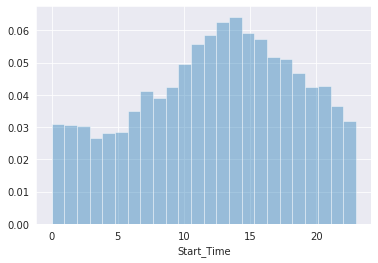

In [47]:
sundays_Start_Time=df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_Start_Time.dt.hour,bins=24, kde=False,norm_hist=True)



1.   On Sundays during afternoon hours we see that more % of accidents occur.




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


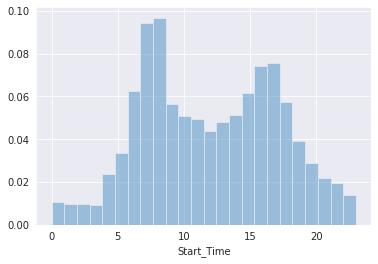

In [48]:
mondays_Start_Time=df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(mondays_Start_Time.dt.hour,bins=24, kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


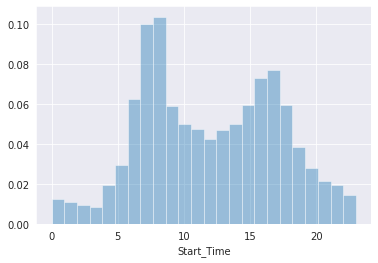

In [49]:
tuesday_Start_Time=df.Start_Time[df.Start_Time.dt.dayofweek == 1]
sns.distplot(tuesday_Start_Time.dt.hour,bins=24, kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


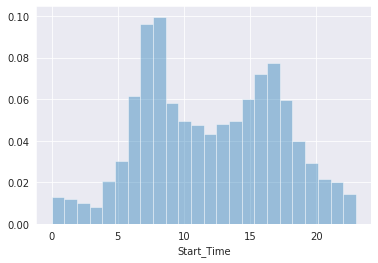

In [50]:
wednesday_Start_Time=df.Start_Time[df.Start_Time.dt.dayofweek == 2]
sns.distplot(wednesday_Start_Time.dt.hour,bins=24, kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


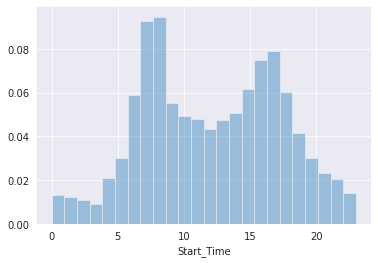

In [51]:
thurs_Start_Time=df.Start_Time[df.Start_Time.dt.dayofweek == 3]
sns.distplot(thurs_Start_Time.dt.hour,bins=24, kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


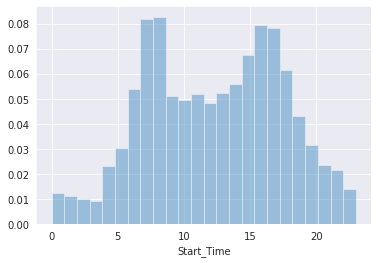

In [52]:
fri_Start_Time=df.Start_Time[df.Start_Time.dt.dayofweek == 4]
sns.distplot(fri_Start_Time.dt.hour,bins=24, kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


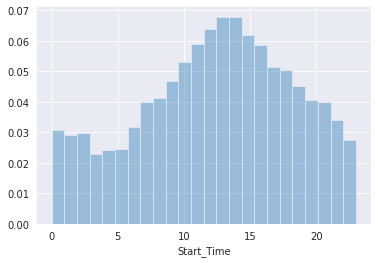

In [53]:
sat_Start_Time=df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.distplot(sat_Start_Time.dt.hour,bins=24, kde=False,norm_hist=True)



# For each day corresponding to each month lets see the distribution



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


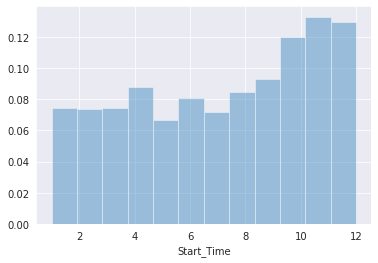

In [54]:

sns.distplot(mondays_Start_Time.dt.month,bins=12, kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


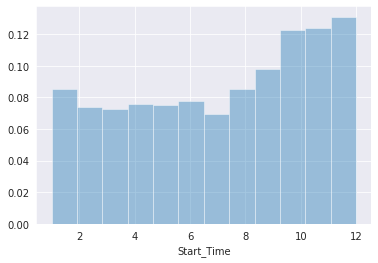

In [55]:
sns.distplot(tuesday_Start_Time.dt.month,bins=12, kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


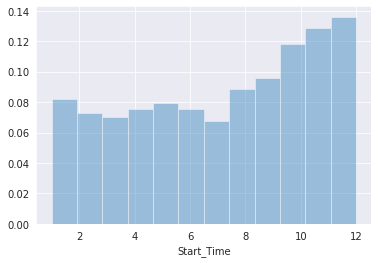

In [56]:
sns.distplot(wednesday_Start_Time.dt.month,bins=12, kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


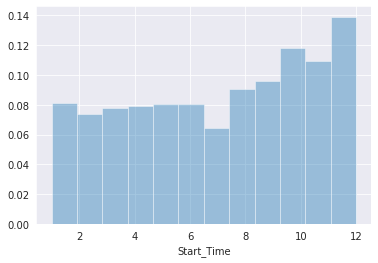

In [57]:
sns.distplot(thurs_Start_Time.dt.month,bins=12, kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


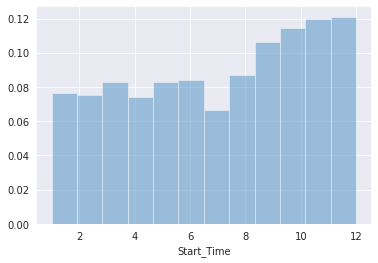

In [58]:
sns.distplot(fri_Start_Time.dt.month,bins=12, kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


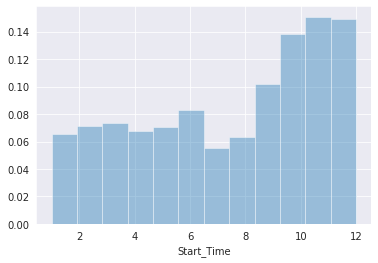

In [59]:
sns.distplot(sat_Start_Time.dt.month,bins=12, kde=False,norm_hist=True)

## For each year lets see the occurences\
# 2016

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


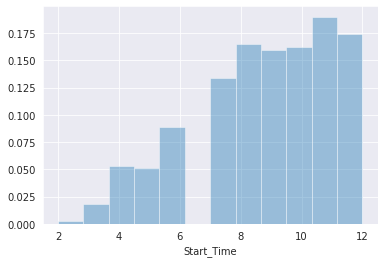

In [60]:
df_2016 = df[df.Start_Time.dt.year==2016]
sns.distplot(df_2016.Start_Time.dt.month,bins=12, kde=False,norm_hist=True)



1.   May be data collection was set up during 2016 as we missed out the middle months
2. missing data in 2016 and some portions of 2017



# 2017

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


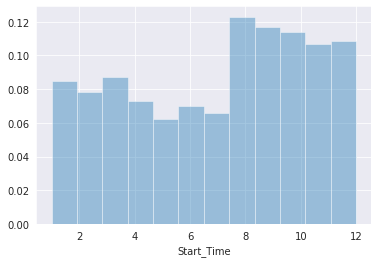

In [61]:
df_2017 = df[df.Start_Time.dt.year==2017]
sns.distplot(df_2017.Start_Time.dt.month,bins=12, kde=False,norm_hist=True)

# 2018

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


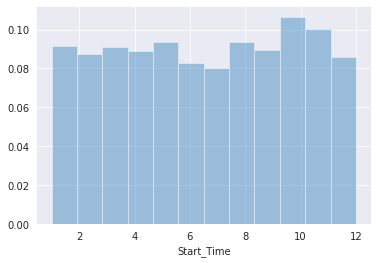

In [62]:
df_2018 = df[df.Start_Time.dt.year==2018]
sns.distplot(df_2018.Start_Time.dt.month,bins=12, kde=False,norm_hist=True)

# 2019

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


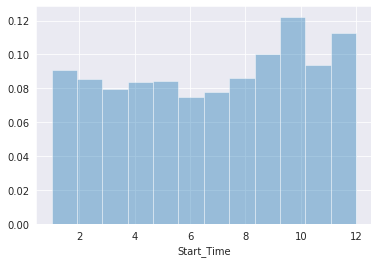

In [63]:
df_2019 = df[df.Start_Time.dt.year==2019]
sns.distplot(df_2019.Start_Time.dt.month,bins=12, kde=False,norm_hist=True)

# StartLatitude , Start Longitude

In [64]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
4232536    34.002480
4232537    32.766960
4232538    33.775450
4232539    33.992460
4232540    34.133930
Name: Start_Lat, Length: 4232541, dtype: float64

In [65]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
4232536   -117.379360
4232537   -117.148060
4232538   -117.847790
4232539   -118.403020
4232540   -117.230920
Name: Start_Lng, Length: 4232541, dtype: float64

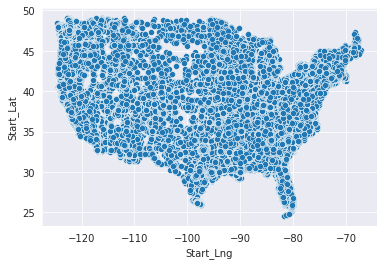

In [66]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat)

### sample df with reduced point size

In [67]:
sample_df=df.sample(int(0.1 * len(df)))

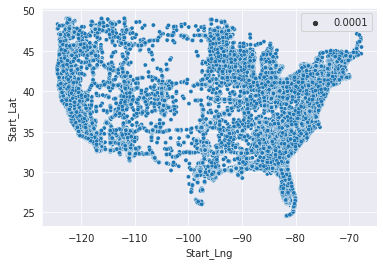

In [68]:
sns.scatterplot(x=sample_df.Start_Lng,y=sample_df.Start_Lat,size = 0.0001)

In [69]:
import folium



1.   Folium is a Python library used for visualizing geospatial data
2.   excellent tool for plotting maps






In [ ]:
folium.Map()

In [71]:
lat,lon = df.Start_Lat[0],df.Start_Lng[0]
lat,lon

(39.865147, -84.058723)

In [72]:
map = folium.Map()
marker = folium.Marker((lat, lon))
marker.add_to(map)
map

In [73]:
 from folium import plugins
from folium.plugins import HeatMap

In [79]:
sample_df = df.sample(int(0.0001 * len(df)))
lat_lon_pairs = zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng))
sample_df

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1201328,A-1201431,MapQuest,201.0,2,2019-09-06 12:33:12,2019-09-06 13:22:37,30.404560,-91.183723,NaN,NaN,0.000,Accident on LA-42 Burbank Dr at Gourrier Ave.,2201.0,Gourrier Ave,L,Baton Rouge,East Baton Rouge,LA,70820-3329,US,US/Central,KBTR,2019-09-06 12:53:00,96.0,96.0,46.0,29.95,10.0,NW,7.0,0.00,Fair,False,False,True,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3149790,A-3152716,Bing,NaN,2,2020-11-11 23:58:00,2020-11-12 01:41:00,48.166513,-98.984021,48.165160,-98.976625,0.353,Stationary traffic on US-2 E from 66th Ave (US...,7598.0,Highway 2,R,Devils Lake,Ramsey,ND,58301-8805,US,US/Central,KDVL,2020-11-11 23:56:00,19.0,2.0,85.0,28.30,7.0,WNW,23.0,0.00,Light Snow / Windy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1221501,A-1221604,MapQuest,201.0,2,2019-09-17 08:29:19,2019-09-17 09:29:10,32.885578,-96.758247,NaN,NaN,0.000,Accident on Meadow Rd at Greenville Ave.,NaN,Meadow Rd,R,Dallas,Dallas,TX,75231,US,US/Central,KDAL,2019-09-17 08:53:00,80.0,80.0,69.0,29.48,10.0,E,7.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
1894367,A-1894479,MapQuest,203.0,3,2018-09-18 07:11:05,2018-09-18 07:40:37,39.293797,-76.610291,NaN,NaN,0.000,Multi-vehicle accident on I-83 Southbound at P...,807.0,Hillen St,R,Baltimore,Baltimore City,MD,21202,US,US/Eastern,KDMH,2018-09-18 06:54:00,75.0,NaN,100.0,29.79,NaN,North,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
641050,A-641078,MapQuest,241.0,2,2020-10-12 17:25:22,2020-10-12 20:13:42,38.465149,-123.009048,NaN,NaN,0.000,Lane blocked due to accident on River Blvd Eas...,10062.0,Bohemian Hwy,R,Sebastopol,Sonoma,CA,95472,US,US/Pacific,KSTS,2020-10-12 17:53:00,83.0,83.0,31.0,29.84,10.0,SSW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571507,A-3578319,Bing,NaN,2,2020-03-13 08:23:00,2020-03-13 09:16:48,34.234842,-118.290932,34.234842,-118.290932,0.000,At La Tuna Canyon Rd - Accident.,NaN,Foothill Fwy E,R,Sun Valley,Los Angeles,CA,91352,US,US/Pacific,KBUR,2020-03-13 08:51:00,52.0,52.0,88.0,29.05,5.0,CALM,0.0,0.06,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1099426,A-1099529,MapQuest,201.0,2,2019-11-04 06:29:39,2019-11-04 07:28:45,43.003315,-83.748947,NaN,NaN,0.000,Accident on I-75 Southbound at Exit 118 M-21 C...,NaN,I-75 N,R,Flint,Genesee,MI,48532,US,US/Eastern,KFNT,2019-11-04 06:53:00,44.0,38.0,73.0,29.08,10.0,S,13.0,0.01,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
3493674,A-3500464,Bing,NaN,2,2020-05-18 19:45:57,2020-05-18 20:30:57,33.467620,-112.110770,33.467620,-112.110770,0.000,At McDowell Rd/Exit 200B - Accident.,NaN,Black Canyon Fwy S,R,Phoenix,Maricopa,AZ,85009,US,US/Mountain,KPHX,2020-05-18 19:47:00,95.0,95.0,12.0,28.55,10.0,W,16.0,0.00,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Day,Day,Day
1894008,A-1894120,MapQuest,201.0,3,2018-09-17 17:47:56,2018-09-17 18:17:45,33.756657,-118.019341,NaN,NaN,0.000,Slow lane blocked due to accident on I-405 Sou...,NaN,San Di

In [80]:
map=folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

In [80]:
import jovian

In [81]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/vijays9718/us-accidents


'https://jovian.ai/vijays9718/us-accidents'